# Part 2 by Mindaugas Skocekas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot.metrics as splt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df_train = pd.read_csv("train.csv") #Creating the dataframe through train dataset.
df_test = pd.read_csv("test.csv") #Creating the dataframe through test dataset.

In [3]:
df_train.head() #First 5 rows of train.csv

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [4]:
df_train.info() 
# Brief information about the dataset
# 23 input and 1 output column, all integers, 15.000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

In [5]:
df_train.isnull().sum()
# Missing value check from all the features
# No missing values in the dataset, no need to apply any methods to deal with missing value problem

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

In [6]:
df_train.describe().T
# Not balanced dataset among input features, difference between mean and median(50%) values are so high.
# Except X2 to X11 columns, standard deviation is too high from X11 to X23 as well as X1.
# Data normalization is required to reduce the effects of outliers.
# RobustScaling approach will be applied in the following section of the code.

,count,mean,std,min,25%,50%,75%,max
Y,15000.0,0.221200,0.415069,0.0,0.00,0.0,0.00,1.0
X1,15000.0,167450.245333,130109.925023,10000.0,50000.00,140000.0,240000.00,800000.0
X2,15000.0,1.604867,0.488896,1.0,1.00,2.0,2.00,2.0
X3,15000.0,1.850000,0.786686,0.0,1.00,2.0,2.00,6.0
X4,15000.0,1.556200,0.522743,0.0,1.00,2.0,2.00,3.0
X5,15000.0,35.367933,9.154118,21.0,28.00,34.0,41.00,75.0
X6,15000.0,-0.020467,1.125048,-2.0,-1.00,0.0,0.00,8.0
X7,15000.0,-0.130933,1.198451,-2.0,-1.00,0.0,0.00,8.0
X8,15000.0,-0.163000,1.202606,-2.0,-1.00,0.0,0.00,8.0
X9,15000.0,-0.214467,1.180578,-2.0,-1.00,0.0,0.00,8.0


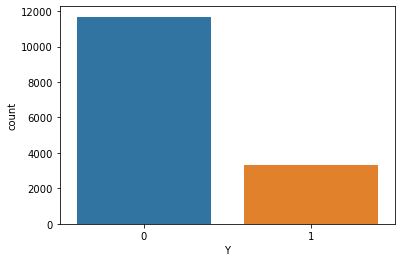

0    11682
1     3318
Name: Y, dtype: int64

In [7]:
sns.countplot(x="Y", data=df_train)
plt.show()

df_train.Y.value_counts()

# Count plot and value counts of Y feature from df_train dataframe. 
# The model will bias to predict test samples as 0 more than 1 due to unbalanced target labels.

## Continuous Feature Analysis 
* Correlation matrix for numeric features

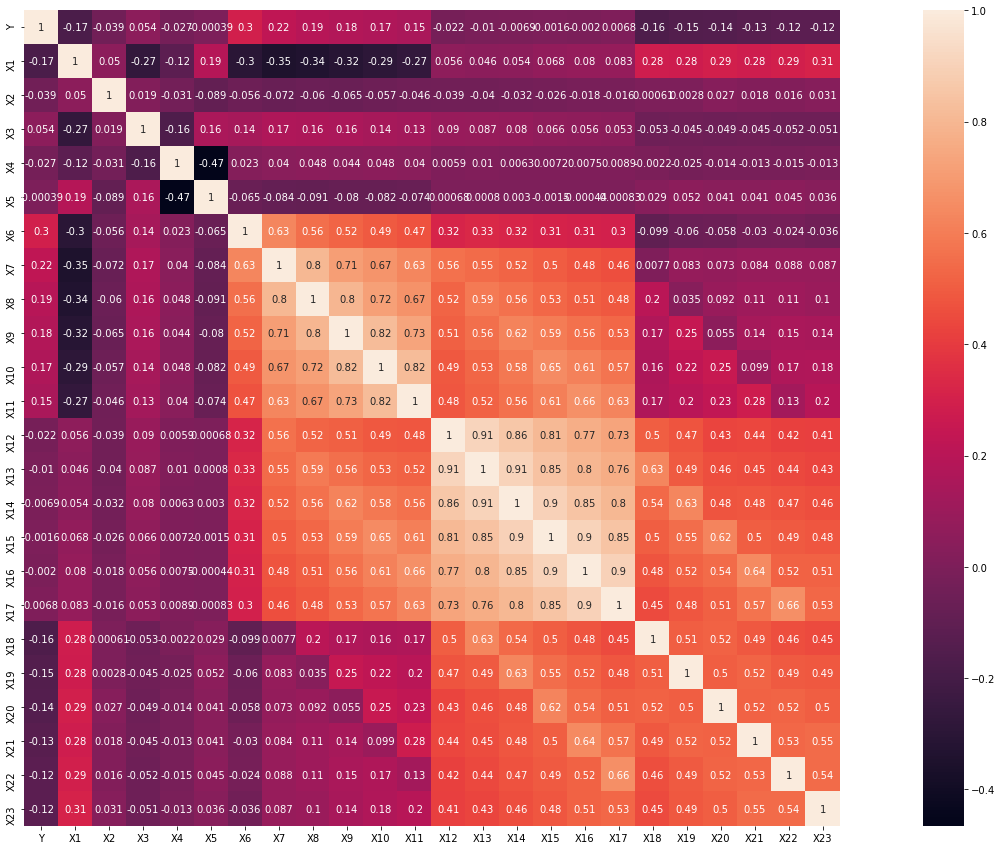

In [8]:
corrmat = df_train.corr(method='spearman') 
plt.subplots(figsize=(30,15))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);

# Correlation matrix to see the correlations among features
# Pearson assumes variables normally distributed.
# Spearman assumes variables are not normally distributed.
# Spearman does not make normality assumption and it can capture non-linear relations also
# From X6 to X11 and X12 to X23, the features are highly correlated with each other.

## Data Preprocessing
* Robust Scaler is used to reduce the effects of outliers in the datasets.
* Robust Scaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [9]:
transformer = RobustScaler()
def scaling(columns):
    return transformer.fit_transform(df_train[columns].values.reshape(-1,1))

columns_to_be_scaled = ["X1","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]
for i in columns_to_be_scaled:
    df_train[i] = scaling(i)

In [10]:
df_train.describe().T #Statistical description of the scaled dataset.

# Less standard deviation after scaling.
# Less difference between max and min values after scaling.

,count,mean,std,min,25%,50%,75%,max
Y,15000.0,0.221200,0.415069,0.000000,0.000000,0.0,0.000000,1.000000
X1,15000.0,0.144475,0.684789,-0.684211,-0.473684,0.0,0.526316,3.473684
X2,15000.0,1.604867,0.488896,1.000000,1.000000,2.0,2.000000,2.000000
X3,15000.0,1.850000,0.786686,0.000000,1.000000,2.0,2.000000,6.000000
X4,15000.0,1.556200,0.522743,0.000000,1.000000,2.0,2.000000,3.000000
X5,15000.0,35.367933,9.154118,21.000000,28.000000,34.0,41.000000,75.000000
X6,15000.0,-0.020467,1.125048,-2.000000,-1.000000,0.0,0.000000,8.000000
X7,15000.0,-0.130933,1.198451,-2.000000,-1.000000,0.0,0.000000,8.000000
X8,15000.0,-0.163000,1.202606,-2.000000,-1.000000,0.0,0.000000,8.000000
X9,15000.0,-0.214467,1.180578,-2.000000,-1.000000,0.0,0.000000,8.000000


## Test - Train Split
 70% for training and 30% for testing

In [11]:
y=df_train["Y"] #output column
X=df_train.drop(["Y"],axis=1) #training columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42) 

## Modeling

### 1-KNN Classifier


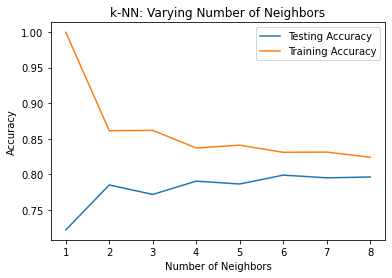

In [12]:
#KNN
# The following code creates 9 models for each K value from 1 to 9 and show the training and testing accuracies for each K.
# From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets
# When K gets higher, the model gets more complicated and requires more computational power and time.
# 5 or 6 looks good from the figure below according to the accuracies.

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<Figure size 432x288 with 0 Axes>

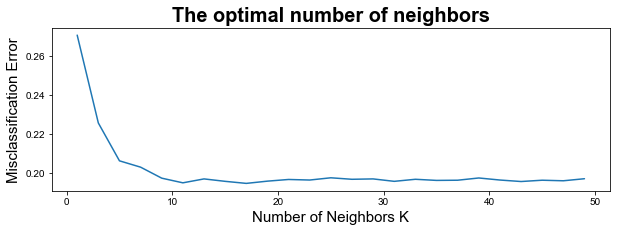

In [13]:
# The code will create models by trying K values from 1 to 50 by using Cross Validation method.
# When the K increases, misclassification error reduces,however, we need to choose the elbow point as K value.
# In the following figure, K can be chosen as 5 or 6.
# Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
# CV is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 
# That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to 
# make predictions on data not used during the training of the model.

k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
  
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,3))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [14]:
knn =KNeighborsClassifier(n_neighbors=5,p=2) #K=5 and p=2 (Minkowski distance)
knn.fit(X_train,y_train) # Creating the model
y_pred = knn.predict(X_test) # Calculating the predictions using the model

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3500
           1       0.53      0.31      0.39      1000

    accuracy                           0.79      4500
   macro avg       0.68      0.62      0.63      4500
weighted avg       0.76      0.79      0.76      4500

AxesSubplot(0.125,0.125;0.62x0.755)


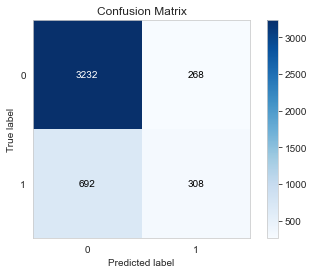

In [15]:
print(classification_report(y_test,y_pred)) #Classification report
print(splt.plot_confusion_matrix(y_test,y_pred)) #Confusion matrix
plt.show();

# Accuracy for KNN Classifier is 0.76. 

### 2- Random Forest Classifier


In [16]:
rf_params = {"max_depth": [2,5,8,10],"max_features":[2,5,8],"n_estimators":[10,500,1000],"min_samples_split":[2,5,10]}
rf_model = RandomForestClassifier() # Object creation
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=2) # 5-Fold cross validation
rf_cv_model.fit(X_train,y_train) # Fitting the data into the algorithm

# 5-Fold Cross Validation is applied
# Hyperparameter tuning is also applied for max_depth,max_features,n_estimators and min_samples_split parameters

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 11.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [17]:
print("Best model parameters:"+str(rf_cv_model.best_params_)) #Finding the best model parameters to create the final model.

Best model parameters:{'max_depth': 5, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [46]:
# Final model creation through the best parameters
rf_model_final = RandomForestClassifier(max_depth=5,max_features=8,min_samples_split=5,n_estimators=1000) # Object creation
rf_model_final.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_final = rf_model_final.predict(X_test) # Getting the predictions

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3500
           1       0.68      0.35      0.46      1000

    accuracy                           0.82      4500
   macro avg       0.76      0.65      0.68      4500
weighted avg       0.80      0.82      0.80      4500

AxesSubplot(0.125,0.125;0.62x0.755)


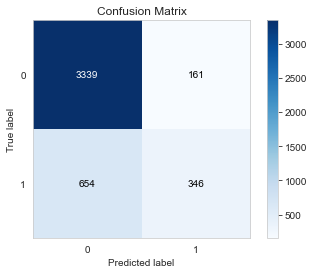

In [47]:
print(classification_report(y_test,y_pred_final)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_final)) # Confusion matrix
plt.show();

# Accuracy for Random Forest Classifier is 0.80. 

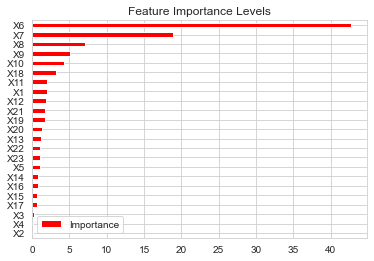

In [48]:
# After hyperparameter optimization, importance of features figure.
# X6 and X7 are the parameters which have the highest impact on the model.

Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh", color = "r")
plt.title("Feature Importance Levels");

### 3- Bagging Classifier (Using Decision Tree as Base Estimator)


In [21]:
dt_params = {"max_depth": [2,5,8,10],"max_features":[2,5,8],"min_samples_split":[2,5,10]} # Model parameters
dt_model = DecisionTreeClassifier() # Object creation
dt_cv_model = GridSearchCV(dt_model,dt_params,cv=5,n_jobs=-1,verbose=2) # 5-Fold cross validation
dt_cv_model.fit(X_train,y_train) # Fitting the data into the algorithm

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [22]:
print("Best model parameters:"+str(dt_cv_model.best_params_)) #Finding the best model parameters to create the final model.

Best model parameters:{'max_depth': 2, 'max_features': 8, 'min_samples_split': 2}


In [44]:
# Final model creation through the best parameters
dt_model_final = RandomForestClassifier(max_depth=2,max_features=8,min_samples_split=2) # Object creation
dt_model_final.fit(X_train,y_train) # Fitting the data into the algorithm

bc = BaggingClassifier(base_estimator=dt_model_final, n_estimators=50) # Object creation
bc.fit(X_train, y_train) # Fit bc to the training set
y_pred_bagging = bc.predict(X_test)# Predict test set labels

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3500
           1       0.75      0.25      0.38      1000

    accuracy                           0.81      4500
   macro avg       0.78      0.61      0.63      4500
weighted avg       0.80      0.81      0.78      4500

AxesSubplot(0.125,0.125;0.62x0.755)


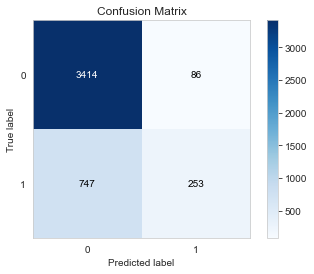

In [45]:
print(classification_report(y_test,y_pred_bagging)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_bagging)) # Confusion matrix
plt.show();

# Accuracy for Bagging Classifier is 0.80. 

### Final Model - Random Forest - Prediction for Test Data
* Random Forest is chosen because it reached the highest accuracy which is 80%.
* The further reason why it was chosen:

* "The fundamental difference between Random Forest and Bagging Classifier is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node".
https://stats.stackexchange.com/questions/264129/what-is-the-difference-between-bagging-and-random-forest-if-only-one-explanatory/422340

In [26]:
df_test.head() #First 5 rows of test data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [28]:
#Data normalization through Robust Scaler
transformer = RobustScaler()
def scaling(columns):
    return transformer.fit_transform(df_test[columns].values.reshape(-1,1))

columns_to_be_scaled = ["X1","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]
for i in columns_to_be_scaled:
    df_test[i] = scaling(i)

In [52]:
y=df_test["Y"] #output column
X=df_test.drop(["Y"],axis=1) #training columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42) #70% for training,30% for testing

### Model with Applying Train-Test Split

In [53]:
# Final model by using Random Forest using the best model parameters which has already calculated above.

rf_model_final_test = RandomForestClassifier(max_depth=5,max_features=8,min_samples_split=5,n_estimators=1000) # Object creation
rf_model_final_test.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_final_test = rf_model_final_test.predict(X_test) # Getting the predictions

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3506
           1       0.68      0.35      0.46       994

    accuracy                           0.82      4500
   macro avg       0.76      0.65      0.68      4500
weighted avg       0.80      0.82      0.80      4500

AxesSubplot(0.125,0.125;0.62x0.755)


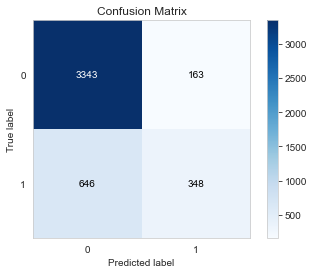

In [54]:
print(classification_report(y_test,y_pred_final_test)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_final_test)) # Confusion matrix
plt.show();

# Accuracy for Random Forest Classifier for testing dataset is 0.80. 

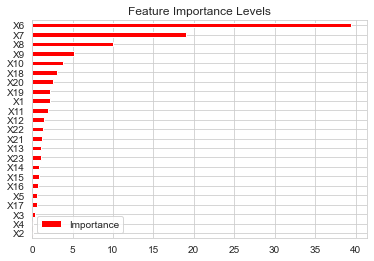

In [56]:
# After hyperparameter optimization, importance of features figure.
# X6 and X7 are the parameters which have the highest impact on the model.

Importance = pd.DataFrame({"Importance": rf_model_final_test.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh", color = "r")
plt.title("Feature Importance Levels");

### Model with not Applying Train-Test Split
* Random Forest algorithm is used by defining in a function.

In [2]:
def randomforest_prediction(training_data, target_data, test_data, max_depth = 5,max_features = 8,min_samples_split=5,n_estimators =100):
    my_model = RandomForestClassifier(max_depth=max_depth, max_features=max_features ,
                                     min_samples_split=min_samples_split,n_estimators=n_estimators )
    my_model.fit(training_data, target_data)
    return my_model.predict(test_data)

In [30]:
y=df_test["Y"] #output column, true labels
X=df_test.drop(["Y"],axis=1) #training columns

In [32]:
df_test.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

In [35]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
            'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21','X22', 'X23']
train_X = df_train[features] # Training features
test_X = df_test[features] # Testing features
train_y = df_train.Y # Training output labels
test_y= df_test["Y"] # Real values of test samples

In [ ]:
# The following table indicates the predictions of model and real Y values from test set.

results = {}
test_prediction = randomforest_prediction(train_X, train_y, test_X)
output = pd.DataFrame({'Y(prediction)': test_prediction,'Y(Real)':test_y})
results['scores'] = test_prediction

final_df = pd.DataFrame(output)
final_df.head(10)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11682
           1       0.68      0.34      0.46      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.65      0.67     15000
weighted avg       0.80      0.82      0.80     15000

AxesSubplot(0.125,0.125;0.62x0.755)


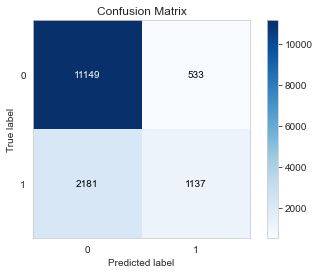

In [42]:
print(classification_report(test_y,test_prediction)) # Classification report
print(splt.plot_confusion_matrix(test_y,test_prediction)) # Confusion matrix
plt.show();

# Accuracy for Random Forest Classifier for testing dataset is 0.80. 